In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from numpy import std, mean, sqrt
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                          MultiComparison)
from scipy.stats import f_oneway
import pingouin as pg

In [2]:
df = pd.read_csv("persuade_corpus.csv", low_memory=False)

In [5]:
#Cleaning the data
df['ell'] = df['ell'].replace(' ', 'Unknown')
df['discourse_effectiveness'] = df['discourse_effectiveness'].replace({'Ineffective':1,'Adequate':2, 'Effective':3})
df.drop(df.index[df['discourse_type'] == 'Unannotated'], inplace=True)

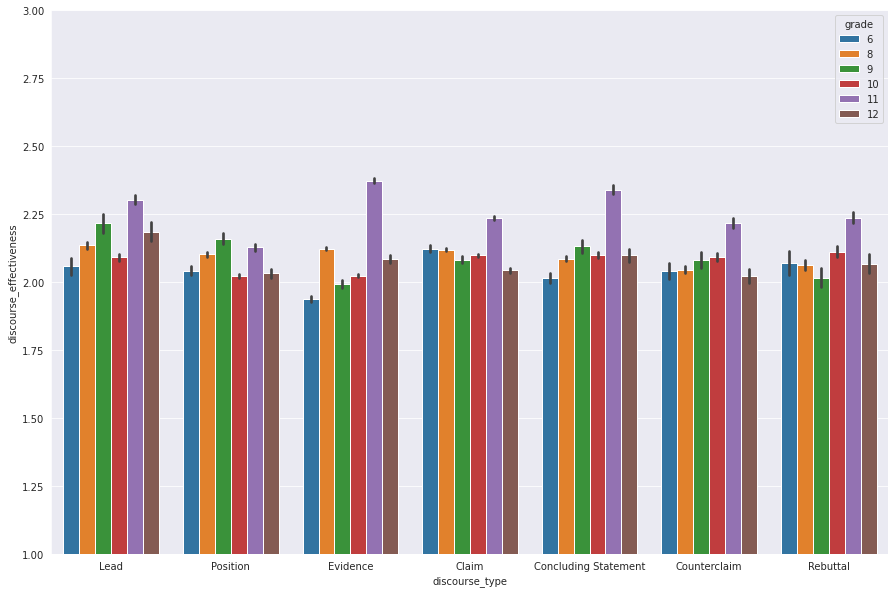

In [27]:
#Graphing
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))

sns.barplot(data = df, 
            x="discourse_type", y="discourse_effectiveness", hue="grade")
plt.xticks(rotation = 0)
plt.ylim(1,3)
plt.show()

In [8]:
#Function to extract descriptive statistics for each metavariable
discourse_elements = df['discourse_type'].unique()
def descriptive1(metavariable):
    variables = pd.Series(df[metavariable].unique()).dropna()
    for variable in variables:
        print("\n", variable)  
        for element in discourse_elements:
            average = df[df[metavariable] == variable][df['discourse_type'] == element]["discourse_effectiveness"]
            print(len(average), "\n", round(average.mean(), 2),"\n", round(average.std(), 2))
           
        print("\n\n TOTAL", variable, "\nn = ", len(df[df[metavariable] == variable]), 
              'mean =',round(df[df[metavariable] == variable]["discourse_effectiveness"].mean(),2),
             'sd = ',round(df[df[metavariable] == variable]["discourse_effectiveness"].std(),2))
    print('\n\n ELEMENT TOTALS')
    for element in discourse_elements:
        print('\n', element,
             'n =', len(df[df.discourse_type == element]),
             'm =', round(df[df['discourse_type'] == element].discourse_effectiveness.mean(),2),
             'sd =', round(df[df['discourse_type'] == element].discourse_effectiveness.std(),2))
    print('\n\nGRAND TOTAL',
         'n =', len(df),
         'm =', round(df.discourse_effectiveness.mean(),2),
         'sd =', round(df.discourse_effectiveness.std(),2))    
        

descriptive1('ell')


 No
12945 
 2.17 
 0.47
22214 
 2.09 
 0.38


<ipython-input-8-a96c53336fed>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average = df[df[metavariable] == variable][df['discourse_type'] == element]["discourse_effectiveness"]


65516 
 2.12 
 0.48
72110 
 2.14 
 0.42
19341 
 2.15 
 0.46
8350 
 2.12 
 0.41
6445 
 2.13 
 0.45


 TOTAL No 
n =  206921 mean = 2.13 sd =  0.44

 Yes
1116 
 1.95 
 0.4
2158 
 1.96 
 0.34
6205 
 1.9 
 0.44
6614 
 1.98 
 0.35
1790 
 1.95 
 0.42
649 
 1.98 
 0.32
347 
 1.96 
 0.36


 TOTAL Yes 
n =  18879 mean = 1.95 sd =  0.39

 Unknown
49 
 2.08 
 0.45
92 
 2.09 
 0.35
233 
 2.02 
 0.36
263 
 2.1 
 0.32
82 
 2.06 
 0.4
23 
 2.09 
 0.29
19 
 2.21 
 0.42


 TOTAL Unknown 
n =  761 mean = 2.07 sd =  0.36


 ELEMENT TOTALS

 Lead n = 15098 m = 2.16 sd = 0.47

 Position n = 25669 m = 2.08 sd = 0.37

 Evidence n = 75588 m = 2.11 sd = 0.48

 Claim n = 82584 m = 2.13 sd = 0.41

 Concluding Statement n = 22283 m = 2.13 sd = 0.45

 Counterclaim n = 9534 m = 2.1 sd = 0.4

 Rebuttal n = 7217 m = 2.12 sd = 0.44


GRAND TOTAL n = 237973 m = 2.12 sd = 0.44


In [32]:
#Functions to extract d, t, and p from binary variables
discourse_elements = df['discourse_type'].unique()

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

def ttest(metavariable):
    stat = []
    p = []
    d = []
    variables = pd.Series(df[metavariable].dropna().unique())
    for element in discourse_elements:
        df_e = df[df['discourse_type'] == element]
        x = df_e[df_e[metavariable] == variables[0]]["discourse_effectiveness"].dropna()
        y = df_e[df_e[metavariable] == variables[1]]["discourse_effectiveness"].dropna()
        stat.append(round(ttest_ind(x,y).statistic, 2))
        p.append(round(ttest_ind(x,y).pvalue, 2))
        d.append(round(cohen_d(x, y), 2))
    print('elements')
    for i in discourse_elements:
        print(i)
    print('d')
    for i in d:
        print(i)
    print('statistic')
    for i in stat:
        print(i)
    print('p')
    for i in p:
        print(i)
        

    
ttest("economically_disadvantaged")

elements
Lead
Position
Evidence
Claim
Concluding Statement
Counterclaim
Rebuttal
d
0.34
0.23
0.39
0.26
0.34
0.22
0.23
statistic
18.33
16.76
47.48
32.71
22.57
9.23
8.3
p
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [30]:
#Extracting f, p, and eta from each discourse element
discourse_elements = df['discourse_type'].unique()
dfRace = df.drop(df.index[df['race_ethnicity'] == 'American Indian/Alaskan Native'])

elements = []
f = []
p = []
eta = []

for element in discourse_elements:
    aov = pg.anova(dv='discourse_effectiveness', between='race_ethnicity', data=dfRace[dfRace['discourse_type'] == element], detailed=True)
    elements.append(element)
    f.append(round(aov['F'][0], 2))
    p.append(round(aov['p-unc'][0], 3))
    eta.append(round(aov['np2'][0], 3))


print('elements')
for i in elements:
    print(i)
print('f')
for i in f:
    print(i)
print('p')
for i in p:
    print(i)
print('eta')
for i in eta:
    print(i)

           Source           SS     DF         MS          F         p-unc  \
0  race_ethnicity    50.852161      4  12.713040  57.952943  1.283575e-48   
1          Within  3295.131667  15021   0.219368        NaN           NaN   

        np2  
0  0.015198  
1       NaN  
           Source           SS     DF        MS          F         p-unc  \
0  race_ethnicity    25.038184      4  6.259546  45.759326  2.285275e-38   
1          Within  3491.772752  25526  0.136793        NaN           NaN   

       np2  
0  0.00712  
1      NaN  
           Source            SS     DF         MS           F          p-unc  \
0  race_ethnicity    323.671813      4  80.917953  355.001798  2.336185e-303   
1          Within  17139.475410  75194   0.227937         NaN            NaN   

        np2  
0  0.018535  
1       NaN  
           Source            SS     DF         MS          F          p-unc  \
0  race_ethnicity    115.889551      4  28.972388  172.04112  5.291950e-147   
1          Within